Code to compare Bs inb KTAO agsinst HRApop v1.0 kidney data

## Install and import libraries

In [108]:
%pip install pandas requests seaborn matplotlib

import pandas as pd
import requests
from io import StringIO
import seaborn as sns
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.


## Load data

In [109]:
df_ktao_left_kidney = pd.read_csv('data/Left_kidney_biomarker_mapping.csv')
df_ktao_left_kidney

,biomarker_label,organ,biomarker_id,ensembl_id
0,B2M,Left kidney,HGNC:914,ENSG00000273686
1,CST3,Left kidney,HGNC:2475,ENSG00000101439
2,IGFBP7,Left kidney,HGNC:5476,ENSG00000163453
3,IL18,Left kidney,HGNC:5986,ENSG00000150782
4,ITGAM,Left kidney,HGNC:6149,ENSG00000169896
5,LCN2,Left kidney,HGNC:6526,ENSG00000148346
6,NRXN1,Left kidney,HGNC:8008,ENSG00000179915
7,S100A6,Left kidney,HGNC:10496,ENSG00000197956
8,SERPINE2,Left kidney,HGNC:8951,ENSG00000135919
9,SPP1,Left kidney,HGNC:11255,ENSG00000118785


In [110]:
df_ktao_right_kidney = pd.read_csv('data/Right_kidney_biomarker_mapping.csv')
df_ktao_right_kidney

,biomarker_label,organ,biomarker_id,ensembl_id
0,B2M,Right kidney,HGNC:914,ENSG00000273686
1,CST3,Right kidney,HGNC:2475,ENSG00000101439
2,FABP1,Right kidney,HGNC:3555,ENSG00000163586
3,HAVCR1,Right kidney,HGNC:17866,ENSG00000113249
4,IGFBP7,Right kidney,HGNC:5476,ENSG00000163453
5,IL18,Right kidney,HGNC:5986,ENSG00000150782
6,ITGAM,Right kidney,HGNC:6149,ENSG00000169896
7,NRXN1,Right kidney,HGNC:8008,ENSG00000179915
8,S100A6,Right kidney,HGNC:10496,ENSG00000197956
9,SERPINE2,Right kidney,HGNC:8951,ENSG00000135919


In [111]:
# merge both dfs
df_ktao_merged = pd.concat([df_ktao_right_kidney, df_ktao_left_kidney])
df_ktao_merged

,biomarker_label,organ,biomarker_id,ensembl_id
0,B2M,Right kidney,HGNC:914,ENSG00000273686
1,CST3,Right kidney,HGNC:2475,ENSG00000101439
2,FABP1,Right kidney,HGNC:3555,ENSG00000163586
3,HAVCR1,Right kidney,HGNC:17866,ENSG00000113249
4,IGFBP7,Right kidney,HGNC:5476,ENSG00000163453
5,IL18,Right kidney,HGNC:5986,ENSG00000150782
6,ITGAM,Right kidney,HGNC:6149,ENSG00000169896
7,NRXN1,Right kidney,HGNC:8008,ENSG00000179915
8,S100A6,Right kidney,HGNC:10496,ENSG00000197956
9,SERPINE2,Right kidney,HGNC:8951,ENSG00000135919


In [112]:
#for HRApop v1.0
query_string = '''
#+ summary: Cell Summaries with Biomarker information by Dataset
#+ description: Computes the cell summaries plus biomarkers and their mean gene expression for each organ by dataset.

PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>
PREFIX ccf: <http://purl.org/ccf/>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX UBERON: <http://purl.obolibrary.org/obo/UBERON_>
PREFIX FMA: <http://purl.org/sig/ont/fma/fma>
PREFIX HRA: <https://purl.humanatlas.io/collection/hra-api>
PREFIX HRApop: <https://purl.humanatlas.io/graph/hra-pop>

SELECT DISTINCT ?organ_id ?organ ?dataset ?sex ?tool ?modality ?cell_id ?cell_label ?cell_count ?cell_percentage
  ?biomarker_id ?biomarker_label ?mean_gene_expr_value
FROM HRA:
FROM HRApop:
WHERE {
  {
    ?sample ccf:has_registration_location ?rui_location .
    ?sample ccf:generates_dataset ?dataset .
  } UNION {
    ?block ccf:subdivided_into_sections ?sample .
    ?block ccf:has_registration_location ?rui_location .
    ?sample ccf:generates_dataset ?dataset .
  }

  ?dataset ccf:has_cell_summary [ 
    ccf:cell_annotation_method ?tool ;
    ccf:modality ?modality ;
    ccf:has_cell_summary_row [
      ccf:cell_id ?cell_id ;
      ccf:cell_label ?raw_cell_label ;
      ccf:cell_count ?cell_count ;
      ccf:percentage_of_total ?cell_percentage ;
      ccf:gene_expr [
        ccf:gene_label ?biomarker_label ;
        ccf:gene_id ?biomarker_id ;
        ccf:mean_gene_expr_value ?mean_gene_expr_value ;
      ]
    ]
  ] .

  [] a ccf:SpatialPlacement ;
    ccf:placement_relative_to ?refOrgan ;
    ccf:placement_for ?rui_location .

  ?refOrgan owl:sameAs* [
    ccf:representation_of ?organ_id ;
    ccf:organ_owner_sex ?sex ;
    skos:prefLabel ?organ
  ] .

  ?organ_id rdfs:label ?organ_label .

  OPTIONAL { ?cell_id rdfs:label ?rdfs_cell_label . }
  BIND(COALESCE(?rdfs_cell_label, ?raw_cell_label) as ?cell_label)
}
ORDER BY ?sex ?tool ?dataset DESC(?cell_count)
'''

query

'\n#+ summary: Cell Summaries with Biomarker information by Dataset\n#+ description: Computes the cell summaries plus biomarkers and their mean gene expression for each organ by dataset.\n\nPREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>\nPREFIX skos: <http://www.w3.org/2004/02/skos/core#>\nPREFIX ccf: <http://purl.org/ccf/>\nPREFIX xsd: <http://www.w3.org/2001/XMLSchema#>\nPREFIX owl: <http://www.w3.org/2002/07/owl#>\nPREFIX UBERON: <http://purl.obolibrary.org/obo/UBERON_>\nPREFIX FMA: <http://purl.org/sig/ont/fma/fma>\nPREFIX HRA: <https://purl.humanatlas.io/collection/hra-api>\nPREFIX HRApop: <https://purl.humanatlas.io/graph/hra-pop>\n\nSELECT DISTINCT ?organ_id ?organ ?dataset ?sex ?tool ?modality ?cell_id ?cell_label ?cell_count ?cell_percentage\n  ?biomarker_id ?biomarker_label ?mean_gene_expr_value\nFROM HRA:\nFROM HRApop:\nWHERE {\n  {\n    ?sample ccf:has_registration_location ?rui_location .\n    ?sample ccf:generates_dataset ?dataset .\n  } UNION {\n    ?block ccf:subd

In [113]:
# define endpoint
url = "https://sparql.humanatlas.io/blazegraph/namespace/kb/sparql"

# define parameters
params = {
    "query": query_string,
}

# set header
headers = {
    "Accept": "text/csv"
}

# Send the GET request
response = requests.get(url, headers=headers, params=params)

# convert text to file-like object
csv_data = StringIO(response.text)

# concert to DataFrame
df = pd.read_csv(csv_data)
df.head()

,organ_id,organ,dataset,sex,tool,modality,cell_id,cell_label,cell_count,cell_percentage,biomarker_id,biomarker_label,mean_gene_expr_value
0,http://purl.obolibrary.org/obo/UBERON_0000948,heart,https://api.cellxgene.cziscience.com/dp/v1/col...,Female,azimuth,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_0002129,Atrial Cardiomyocyte,430,0.402999,HGNC:12403,TTN,2.725458
1,http://purl.obolibrary.org/obo/UBERON_0000948,heart,https://api.cellxgene.cziscience.com/dp/v1/col...,Female,azimuth,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_0002129,Atrial Cardiomyocyte,430,0.402999,HGNC:2928,DMD,2.114956
2,http://purl.obolibrary.org/obo/UBERON_0000948,heart,https://api.cellxgene.cziscience.com/dp/v1/col...,Female,azimuth,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_0002129,Atrial Cardiomyocyte,430,0.402999,HGNC:11068,SLC8A1,1.828498
3,http://purl.obolibrary.org/obo/UBERON_0000948,heart,https://api.cellxgene.cziscience.com/dp/v1/col...,Female,azimuth,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_0002129,Atrial Cardiomyocyte,430,0.402999,HGNC:7551,MYBPC3,1.461267
4,http://purl.obolibrary.org/obo/UBERON_0000948,heart,https://api.cellxgene.cziscience.com/dp/v1/col...,Female,azimuth,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_0002129,Atrial Cardiomyocyte,430,0.402999,HGNC:24098,SORBS2,1.654607


In [114]:
# keep only kidney
df_hra_pop_filtered = df[df['organ'].str.contains('kidney')]
df_hra_pop_filtered

,organ_id,organ,dataset,sex,tool,modality,cell_id,cell_label,cell_count,cell_percentage,biomarker_id,biomarker_label,mean_gene_expr_value
2170,http://purl.obolibrary.org/obo/UBERON_0004538,Left kidney,https://api.cellxgene.cziscience.com/dp/v1/col...,Female,azimuth,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_4030012,kidney loop of Henle short descending thin lim...,6383,0.568692,HGNC:28685,OCIAD2,1.806449
2171,http://purl.obolibrary.org/obo/UBERON_0004538,Left kidney,https://api.cellxgene.cziscience.com/dp/v1/col...,Female,azimuth,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_4030012,kidney loop of Henle short descending thin lim...,6383,0.568692,HGNC:24930,TMEM176A,1.465505
2172,http://purl.obolibrary.org/obo/UBERON_0004538,Left kidney,https://api.cellxgene.cziscience.com/dp/v1/col...,Female,azimuth,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_4030012,kidney loop of Henle short descending thin lim...,6383,0.568692,HGNC:6541,LDHB,3.025730
2173,http://purl.obolibrary.org/obo/UBERON_0004538,Left kidney,https://api.cellxgene.cziscience.com/dp/v1/col...,Female,azimuth,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_4030012,kidney loop of Henle short descending thin lim...,6383,0.568692,HGNC:843,ATP5MC3,3.073322
2174,http://purl.obolibrary.org/obo/UBERON_0004538,Left kidney,https://api.cellxgene.cziscience.com/dp/v1/col...,Female,azimuth,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_4030012,kidney loop of Henle short descending thin lim...,6383,0.568692,HGNC:7061,MGST1,2.340141
...,...,...,...,...,...,...,...,...,...,...,...,...,...
131245,http://purl.obolibrary.org/obo/UBERON_0004539,Right kidney,https://entity.api.hubmapconsortium.org/entiti...,Male,azimuth,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_0000875,non-classical monocyte,2,0.000088,HGNC:38043,SEPTIN7P7,0.125000
131246,http://purl.obolibrary.org/obo/UBERON_0004539,Right kidney,https://entity.api.hubmapconsortium.org/entiti...,Male,azimuth,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_0000875,non-classical monocyte,2,0.000088,HGNC:3999,FTL,1.000000
131247,http://purl.obolibrary.org/obo/UBERON_0004539,Right kidney,https://entity.api.hubmapconsortium.org/entiti...,Male,azimuth,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_0000875,non-classical monocyte,2,0.000088,HGNC:29720,MRPL50P2,0.250000
131248,http://purl.obolibrary.org/obo/UBERON_0004539,Right kidney,https://entity.api.hubmapconsortium.org/entiti...,Male,azimuth,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_0000875,non-classical monocyte,2,0.000088,ensembl:ENSG00000277662.1,ENSG00000277662.1,0.166666


## Check for matches between KTAO and HRApop v1.0

In [115]:
df_merged = pd.merge(df_hra_pop_filtered, df_ktao_merged, on=["biomarker_id","biomarker_label","organ"], how="inner")
df_merged = df_merged[['dataset','sex','tool', 'biomarker_label','mean_gene_expr_value']].drop_duplicates()
df_merged

,dataset,sex,tool,biomarker_label,mean_gene_expr_value
0,https://api.cellxgene.cziscience.com/dp/v1/col...,Female,azimuth,B2M,3.748658
1,https://api.cellxgene.cziscience.com/dp/v1/col...,Female,azimuth,S100A6,3.694490
2,https://entity.api.hubmapconsortium.org/entiti...,Female,azimuth,B2M,1.333333
3,https://entity.api.hubmapconsortium.org/entiti...,Female,azimuth,SPP1,0.148600
4,https://entity.api.hubmapconsortium.org/entiti...,Female,azimuth,S100A6,8.969618
...,...,...,...,...,...
769,https://entity.api.hubmapconsortium.org/entiti...,Male,azimuth,B2M,1.435898
770,https://entity.api.hubmapconsortium.org/entiti...,Male,azimuth,IGFBP7,0.769231
771,https://entity.api.hubmapconsortium.org/entiti...,Male,azimuth,B2M,0.775862
772,https://entity.api.hubmapconsortium.org/entiti...,Male,azimuth,IGFBP7,0.814286


In [116]:
# datasets that have these biomarkers
df_merged['dataset'].unique()

array(['https://api.cellxgene.cziscience.com/dp/v1/collections/e5f58829-1a66-40b5-a624-9046778e74f5#TSP2$kidney',
       'https://entity.api.hubmapconsortium.org/entities/018a905cdbdff684760859f594d3fd77',
       'https://entity.api.hubmapconsortium.org/entities/0a21f3fa27109790483f2a0729be53de',
       'https://entity.api.hubmapconsortium.org/entities/173de2e80adf6a73ac8cff5ccce20dfc',
       'https://entity.api.hubmapconsortium.org/entities/1b5c7d45cb0e475b73f9280d092d34a5',
       'https://entity.api.hubmapconsortium.org/entities/206d669d243f6dab04cc126a52cdab8d',
       'https://entity.api.hubmapconsortium.org/entities/29596bee3f70b2bfc89d184fe38a3daa',
       'https://entity.api.hubmapconsortium.org/entities/2cd4eabca0b653af7f3b79534b2d641f',
       'https://entity.api.hubmapconsortium.org/entities/32b783576b6c88fec03f5e5988e3effa',
       'https://entity.api.hubmapconsortium.org/entities/367fee3b40cba682063289505b922be1',
       'https://entity.api.hubmapconsortium.org/entities/4

## Visualize

In [117]:
# Aggregate to ensure uniqueness
df_agg = df_merged.groupby(["biomarker_label", "dataset"])[
    "mean_gene_expr_value"].mean().reset_index()

In [118]:

ax = sns.heatmap(
    df_agg,
    cmap="viridis",
    annot=True,
    fmt=".2f",
    cbar_kws={'label': 'Mean Gene Expression'}
)

# Rotate cell annotation labels
for text in ax.texts:
    text.set_rotation(90)

plt.title("Mean Gene Expression per Biomarker per Dataset")
plt.xlabel("Dataset")
plt.ylabel("Biomarker")
plt.show()

ValueError: could not convert string to float: 'B2M'

<Figure size 4000x1000 with 0 Axes>

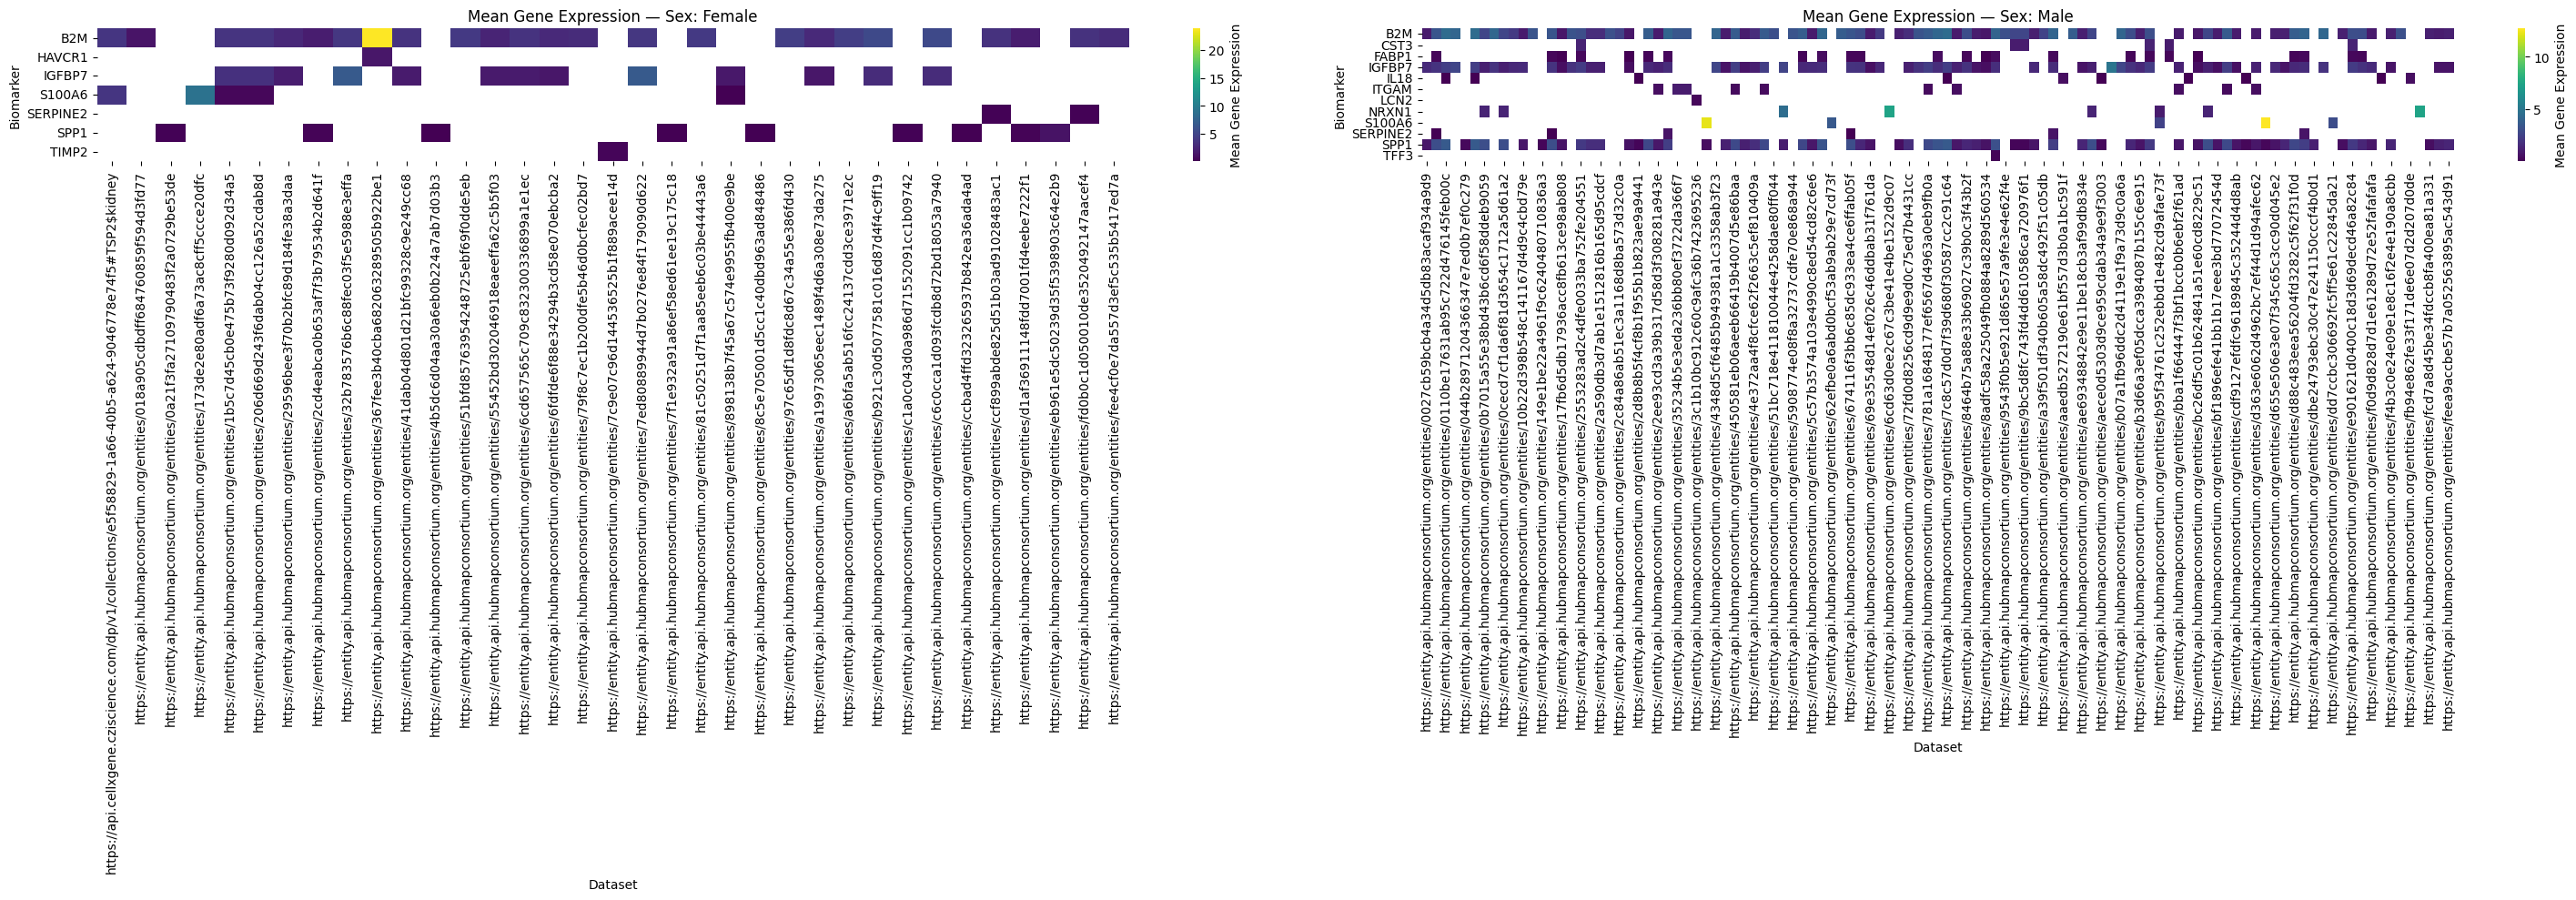

In [ ]:


plt.figure(figsize=(40, 10))

# Aggregate by biomarker, dataset, and sex
df_agg = (
    df_merged.groupby(["sex", "biomarker_label", "dataset"])["mean_gene_expr_value"]
      .mean()
      .reset_index()
)

# Get unique sexes
sexes = df_agg["sex"].unique()

# Create subplots: one per sex
fig, axes = plt.subplots(1, len(sexes), figsize=(
    15 * len(sexes), 10), squeeze=False)

for ax, sex in zip(axes[0], sexes):
    # Pivot for this sex
    heatmap_data = df_agg.query("sex == @sex").pivot(
        index="biomarker_label",
        columns="dataset",
        values="mean_gene_expr_value"
    )

    # Plot heatmap
    sns.heatmap(
        heatmap_data,
        cmap="viridis",
        # annot=True,
        annot=False,
        fmt=".2f",
        cbar_kws={'label': 'Mean Gene Expression'},
        ax=ax
    )

    # Rotate cell annotations
    for text in ax.texts:
        text.set_rotation(90)
        
    # Prevent y tick labels from rotating
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

    ax.set_title(f"Mean Gene Expression — Sex: {sex}")
    ax.set_xlabel("Dataset")
    ax.set_ylabel("Biomarker")

plt.tight_layout()
plt.show()